In [1]:
cd ..

/Users/mac/Desktop/Work Space/Implementation-RLexecution


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from agent import Agent

In [3]:
data = lambda seed : pd.read_csv(f'result/seed{seed}/sell_money.csv', index_col=0)

sell_moneys_ma = [data(seed)['sell_money'].rolling(100).mean().values.reshape(-1,1) for seed in range(1, 6)]
sell_moneys_ma = np.concatenate(sell_moneys_ma, axis=-1)
sell_moneys_ma_mean = np.mean(sell_moneys_ma, axis=-1)
sell_moneys_ma_std = np.std(sell_moneys_ma, axis=-1)

In [4]:
sell_moneys = [data(seed)['sell_money'].values.reshape(-1,1) for seed in range(1, 6)]
sell_moneys = np.concatenate(sell_moneys, axis=-1)
sell_moneys_mean = np.mean(sell_moneys, axis=-1)
sell_moneys_std = np.std(sell_moneys, axis=-1)

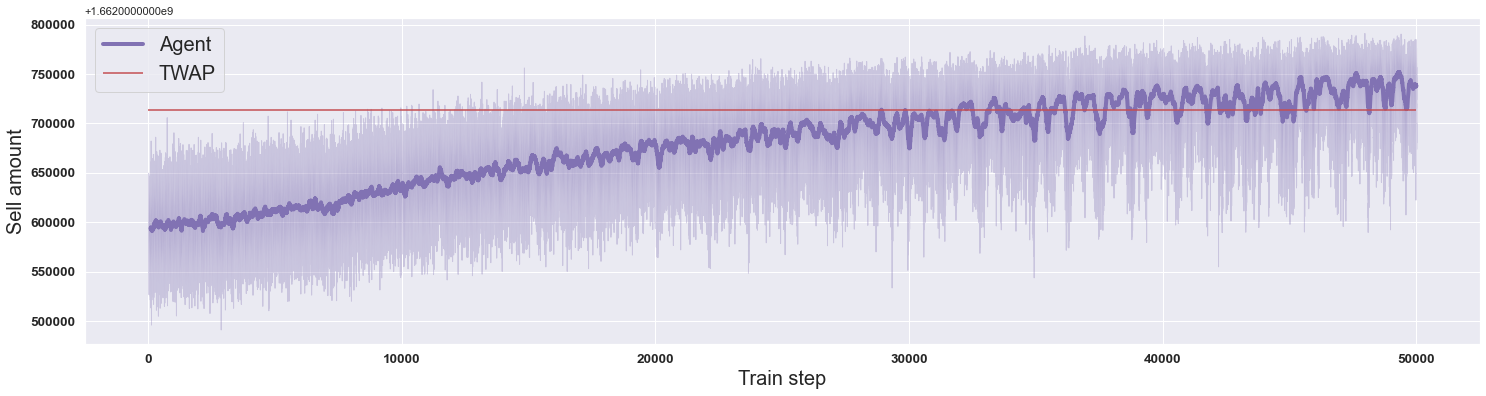

In [5]:
linewidth = 4.0
beta = 0.5

sns.set(style='darkgrid')
plt.figure(figsize=(25, 6))
plt.rc('legend', fontsize=20)

plt.xlabel('Train step', fontsize=20)
plt.ylabel('Sell amount', fontsize=20)

plt.xticks(weight='bold', fontsize=13.5)
plt.yticks(weight='bold', fontsize=13.5)

plt.plot(sell_moneys_ma_mean, color="C4", linewidth=linewidth, label='Agent')

# plt.plot(sell_moneys_mean, color="C3", linewidth=linewidth, label='money')

plt.fill_between(x=np.arange(sell_moneys_ma_mean.shape[0]), 
                y1=sell_moneys_mean + beta*sell_moneys_std, 
                y2=sell_moneys_mean - beta*sell_moneys_std, 
                alpha=0.3, color="C4")

plt.hlines(y=1662713694.4188201, color='C3', xmin=0, xmax=50000, label='TWAP')
plt.legend()

In [6]:
from network import Qnet
from buffer import Buffer
from simulator import Simulator

config = {
    'waiting': 20,
    'time_cut': 10,
    'target_volume': 30000,
    'minima_volume': 1000,
    'episode': 10000,
    'batch_size': 64,
    }

buffer = Buffer(1000)
qnet = Qnet(s_dim=23, a_dim=10)
qnet.load_state_dict(torch.load('result/seed1/qnet.pth'))
simulator = Simulator(qnet, buffer)
sell_money, _, _ = simulator.play_horizon(config)

In [7]:
sell_money

1706393207.1384726